In [112]:
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm, PowerNorm

In [167]:
def read_dataframe(PATH, N):
    df = pd.DataFrame()

    for i in range(N):
        results_dict = pickle.load(open(PATH %(i),'rb'))
        for N_PCs in results_dict.keys():
            for gra in results_dict[N_PCs].keys():
                if type(results_dict[N_PCs][gra]) != str:
                    n_classifiers = len(results_dict[N_PCs][gra].keys())
                    for clf in results_dict[N_PCs][gra].keys():
                        aux_dict = results_dict[N_PCs][gra][clf]
                        aux_dict['N_PCs'] = N_PCs
                        aux_dict['Granularity'] = gra
                        aux_dict['Classifier'] = clf
                        aux_dict['Iteration'] = i
                        aux_dict['Time'] = results_dict[N_PCs][gra][clf]['time']
                        df = df.append(aux_dict, ignore_index=True)
                        
    return df

In [162]:
input_id = 0

for st in ['union', 'intersection']:
    for NN in [1600, 2000, 2400, 2800, 3200, 1795, 3584]:
        for tipo in ['fft', 'tudo', 'fft_filtrado', 'tudo_filtrado']:
            PATH = f"Classification_{NN}_{tipo}"
            FILE = "/Classifiers_result__{}__%i__{}__.pkl".format(input_id, st)
            RESULTS_FILE = f'results_{st}_{NN}_{tipo}.csv'
            
            if len(os.listdir(PATH)) == 10 and RESULTS_FILE not in os.listdir('Results/'):
                print(RESULTS_FILE)
                df = read_dataframe(PATH + FILE, 5)
                
                results_df = df.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Accuracy':['mean','std'],
                                                                    'features':['mean','std'],
                                                                    'variation':['mean','std']})
                
                results_df.to_csv('Results/' + RESULTS_FILE)

In [318]:
input_id = 0
st = 'union'
NN = 3584
tipo = 'tudo_filtrado'
N = 5

PATH = "Classification_{}_{}/Classifiers_result__{}__%i__{}__.pkl".format(NN, tipo, input_id, st)

df = read_dataframe(PATH, N)
df['Time[s]'] = df['Time'].dt.total_seconds()
results_df = df.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Accuracy':['mean','std'],
                                                                    'features':['mean','std'],
                                                                    'variation':['mean','std']})
time_df = df.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Time[s]':['mean','std']})

results_df.to_csv(f'Results/results_{st}_{NN}_{tipo}.csv')

In [319]:
input_id = 0
st = 'intersection'
NN = 3584
tipo = 'tudo_filtrado'
N = 5

PATH = "Classification_{}_{}/Classifiers_result__{}__%i__{}__.pkl".format(NN, tipo, input_id, st)

df2 = read_dataframe(PATH, N)
df2['Time[s]'] = df2['Time'].dt.total_seconds()
results_df2 = df2.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Accuracy':['mean','std'],
                                                                    'features':['mean','std'],
                                                                    'variation':['mean','std']})
time_df2 = df2.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Time[s]':['mean','std']})

results_df2.to_csv(f'Results/results_{st}_{NN}_{tipo}.csv')

In [320]:
results_df[results_df[('Accuracy','mean')] > 0.85].groupby(['Granularity', 'N_PCs']).agg({('Accuracy','mean'):['count']})

Accuracy
                      mean
                     count
Granularity N_PCs         
4.0         10.0         2
            15.0         2
5.0         10.0         2
            15.0         2
7.0         10.0         2
            15.0         2

In [321]:
results_df2[results_df2[('Accuracy','mean')] > 0.85].groupby(['Granularity', 'N_PCs']).agg({('Accuracy','mean'):['count']})

Accuracy
                      mean
                     count
Granularity N_PCs         
4.0         10.0         1
            15.0         1
5.0         10.0         1
            15.0         1
7.0         15.0         1

# RESULTADOS

In [322]:
time_df

Time[s]           
                                       mean        std
Classifier    Granularity N_PCs                       
AdaBoost      4.0         5.0    183.204228  33.063610
                          7.0    183.204769  33.063642
                          10.0   183.204350  33.063592
                          15.0   183.204284  33.063505
              5.0         5.0    183.204343  33.063802
...                                     ...        ...
Random Forest 5.0         15.0   183.206951  33.063354
              7.0         5.0    183.207328  33.063684
                          7.0    183.207172  33.063448
                          10.0   183.206995  33.063733
                          15.0   183.206821  33.063798

[120 rows x 2 columns]

In [323]:
time_df2

Time[s]           
                                      mean        std
Classifier    Granularity N_PCs                      
AdaBoost      4.0         5.0    62.589125  48.418684
                          7.0    62.591211  48.422050
                          10.0   62.589297  48.418407
                          15.0   62.589742  48.419070
              5.0         5.0    62.589147  48.418380
...                                    ...        ...
Random Forest 5.0         15.0   62.592640  48.418626
              7.0         5.0    62.592911  48.418714
                          7.0    62.592445  48.417936
                          10.0   62.591984  48.418330
                          15.0   62.591762  48.417955

[120 rows x 2 columns]

In [325]:
best_granularity = 7
best_N_PCs = 15

In [326]:
union = results_df.query(f'Granularity == {best_granularity} and N_PCs == {best_N_PCs}')
intersection = results_df2.query(f'Granularity == {best_granularity} and N_PCs == {best_N_PCs}')

union_time = time_df.query(f'Granularity == {best_granularity} and N_PCs == {best_N_PCs}')
intersection_time = time_df2.query(f'Granularity == {best_granularity} and N_PCs == {best_N_PCs}')


tabela_latex = ""
for (row_union, row_intersection, row_time_u, row_time_i) in zip(union.iterrows(), intersection.iterrows(), union_time.iterrows(), intersection_time.iterrows()):
    linha_latex =  "{:20} & {:6.2f} $\pm$ {:6.2f} & {:6.2f} $\pm$ {:6.2f} & {:6.0f}:{:7.4f}  $\pm$ {:6.0f}:{:7.4f} & {:6.0f}:{:7.4f}  $\pm$ {:6.0f}:{:7.4f} \\\\ \n".format(row_union[0][0],
                                                row_union[1][('Accuracy', 'mean')]*100,
                                                row_union[1][('Accuracy', 'std')]*100,
                                                row_intersection[1][('Accuracy', 'mean')]*100,
                                                row_intersection[1][('Accuracy', 'std')]*100,
                                                row_time_u[1][('Time[s]', 'mean')]//60,
                                                row_time_u[1][('Time[s]', 'mean')]%60,
                                                row_time_u[1][('Time[s]', 'std')]//60,
                                                row_time_u[1][('Time[s]', 'std')]%60,
                                                row_time_i[1][('Time[s]', 'mean')]//60,
                                                row_time_i[1][('Time[s]', 'mean')]%60,
                                                row_time_i[1][('Time[s]', 'std')]//60,
                                                row_time_i[1][('Time[s]', 'std')]%60)
    tabela_latex += linha_latex

In [327]:
print(tabela_latex)
"Quadratic Discriminant Analysis"

AdaBoost             &  61.87 $\pm$   8.28 &  63.95 $\pm$   9.05 &      3: 3.2043  $\pm$      0:33.0637 &      1: 2.5893  $\pm$      0:48.4183 \\ 
Decision Tree        &  79.00 $\pm$   2.58 &  79.57 $\pm$   5.59 &      3: 3.1967  $\pm$      0:33.0634 &      1: 2.5814  $\pm$      0:48.4180 \\ 
Gaussian Process     &  79.61 $\pm$   4.24 &  33.33 $\pm$   0.00 &      3: 3.2197  $\pm$      0:33.0644 &      1: 2.6043  $\pm$      0:48.4178 \\ 
Linear SVM           &  80.52 $\pm$   6.16 &  76.21 $\pm$   5.23 &      3: 3.1977  $\pm$      0:33.0634 &      1: 2.5826  $\pm$      0:48.4180 \\ 
Naive Bayes          &  84.42 $\pm$   4.98 &  75.39 $\pm$   6.64 &      3: 3.1967  $\pm$      0:33.0635 &      1: 2.5816  $\pm$      0:48.4182 \\ 
Nearest Neighbors    &  83.15 $\pm$   3.30 &  79.71 $\pm$   4.27 &      3: 3.2035  $\pm$      0:33.0638 &      1: 2.5884  $\pm$      0:48.4183 \\ 
Neural Net           &  88.58 $\pm$   4.85 &  88.87 $\pm$   4.57 &      3: 3.1967  $\pm$      0:33.0634 &      1: 2.58

'Quadratic Discriminant Analysis'

# MATRIZ DE CONFUSÃO

In [328]:
best_classifier = "Neural Net"

confusion_matrix = df[(df['Classifier'] == best_classifier) * (df['Granularity'] == best_granularity) * (df['N_PCs'] == best_N_PCs)]['matrix'].sum()

/home/matheus/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


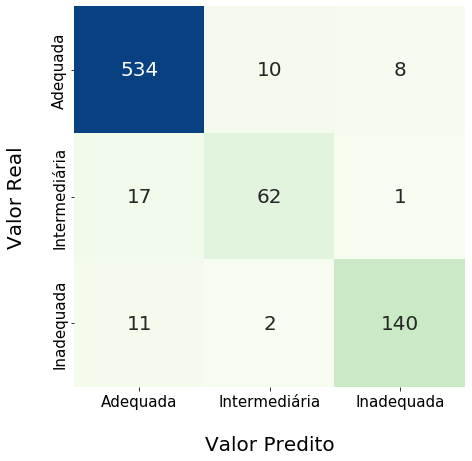

In [329]:
plt.figure(figsize=(7,7))

g = sns.heatmap(confusion_matrix, 
            cmap='GnBu', 
            fmt='d', 
            annot=True, 
            cbar=False, 
            annot_kws={'fontsize':20},
            xticklabels=['Adequada', 'Intermediária', 'Inadequada'],
            yticklabels=['Adequada', 'Intermediária', 'Inadequada'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize=15)
g.set_xticklabels(labels=g.get_xticklabels(), fontsize=15)


plt.ylabel('Valor Real\n', fontsize=20)
plt.xlabel('\nValor Predito', fontsize=20)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

# BUTTERWORTH

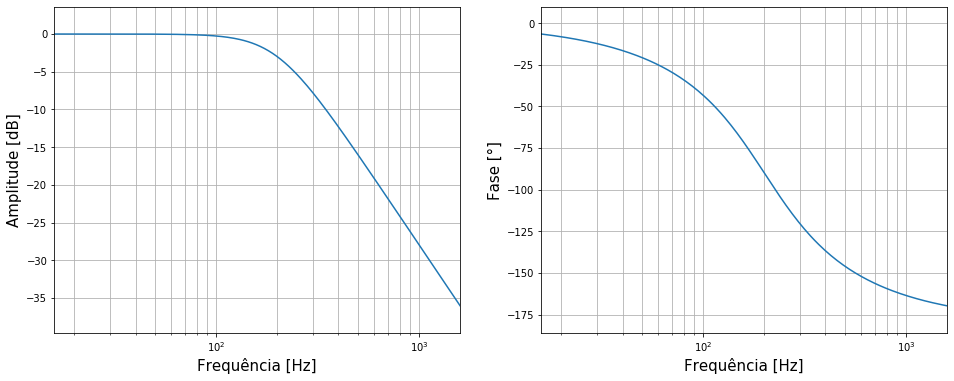

In [140]:
import scipy.signal as signal
import matplotlib.pyplot as plt

fc = 200
fs = 24e3

sos = signal.butter(2, 2 * np.pi * fc, "low", fs=fs, output="sos")

b, a = signal.butter(2, 2 * np.pi * fc, "low", analog=True)
w, h = signal.freqs(b, a)


fig = plt.figure(figsize=(16,6))
ax = fig.subplots(1,2)

ax[0].semilogx(w/(2*np.pi), 20 * np.log10(abs(h)))

ax[1].semilogx(w/(2*np.pi), np.angle(h)*180/np.pi)

ax[0].set_xlabel('Frequência [Hz]', fontsize=15)
ax[0].set_ylabel('Amplitude [dB]', fontsize=15)
ax[1].set_xlabel('Frequência [Hz]', fontsize=15)
ax[1].set_ylabel('Fase [°]', fontsize=15)

ax[0].margins(0, 0.1)
ax[1].margins(0, 0.1)
ax[0].grid(which='both', axis='both')
ax[1].grid(which='both', axis='both')
plt.savefig('Bode.png', bbox_inches='tight')
plt.show()

In [141]:
b

array([1579136.7041743])

In [142]:
a

array([1.00000000e+00, 1.77715318e+03, 1.57913670e+06])